In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 1. 读取Excel文件
df_info = pd.read_excel('商品销售数据.xlsx', sheet_name='信息表')
df_sales = pd.read_excel('商品销售数据.xlsx', sheet_name='销售数据表')

# 查看数据结构
print("信息表结构:")
print(df_info.head())
print("\n销售数据表结构:")
print(df_sales.head())

# 2. 合并数据（右连接，保留销售数据表的所有记录）
df_merged = pd.merge(df_info, df_sales, on='商品编号', how='right')
print(f"合并后数据形状: {df_merged.shape}")

# 3. 数据预处理
# 转换日期格式
df_merged['订单日期'] = pd.to_datetime(df_merged['订单日期'])
df_merged['月份'] = df_merged['订单日期'].dt.to_period('M')  # 提取年月
df_merged['月份_str'] = df_merged['月份'].astype(str)

# 计算销售额
df_merged['销售额'] = df_merged['订单数量'] * df_merged['商品销售价']

# 查看合并后的数据
print(df_merged.head())

信息表结构:
   商品大类 商品小类    商品名称   商品编号  商品销售价
0  运动上装   背心    瑜伽背心  bx001     48
1  运动上装   背心  跑步运动背心  bx002     39
2  运动上装   背心  纯色简约背心  bx003     36
3  运动上装   背心  轻薄透气背心  bx004     49
4  运动上装   背心  修身运动背心  bx005     50

销售数据表结构:
        订单日期          订单编号   商品编号  订单数量
0 2022-01-01  HS2022000001  fd003    26
1 2022-01-01  HS2022000002  fd004    28
2 2022-01-01  HS2022000003  sh001    20
3 2022-01-01  HS2022000004  sh003    35
4 2022-01-01  HS2022000005  bx002    60
合并后数据形状: (2040, 8)
   商品大类 商品小类     商品名称   商品编号  商品销售价       订单日期          订单编号  订单数量       月份  \
0  运动配饰   发带   纯色弹力发带  fd003   12.0 2022-01-01  HS2022000001    26  2022-01   
1  运动配饰   发带  糖果色弹力发带  fd004   16.0 2022-01-01  HS2022000002    28  2022-01   
2  运动配饰   手环   篮球运动手环  sh001    8.0 2022-01-01  HS2022000003    20  2022-01   
3  运动配饰   手环  小清新硅胶手环  sh003    6.0 2022-01-01  HS2022000004    35  2022-01   
4  运动上装   背心   跑步运动背心  bx002   39.0 2022-01-01  HS2022000005    60  2022-01   

    月份_str     销售额  
0  2022-01   312.0


=== 问题1: 商品每月销售变化趋势 ===
每月销售统计:
         月份       销售额   订单数量  订单编号   月份_str       平均订单金额
0   2022-01  344878.0   8705   141  2022-01  2445.943262
1   2022-02  375111.0   8441   142  2022-02  2641.626761
2   2022-03  431575.0  10106   168  2022-03  2568.898810
3   2022-04  408359.0   9588   156  2022-04  2617.685897
4   2022-05  463358.0  10392   173  2022-05  2678.369942
5   2022-06  424416.0  10206   166  2022-06  2556.722892
6   2022-07  490090.0  11125   183  2022-07  2678.087432
7   2022-08  468356.0  11210   185  2022-08  2531.654054
8   2022-09  433489.0  10559   177  2022-09  2449.090395
9   2022-10  485727.0  11357   185  2022-10  2625.551351
10  2022-11  484643.0  10953   179  2022-11  2707.502793
11  2022-12  470306.0  10999   185  2022-12  2542.194595


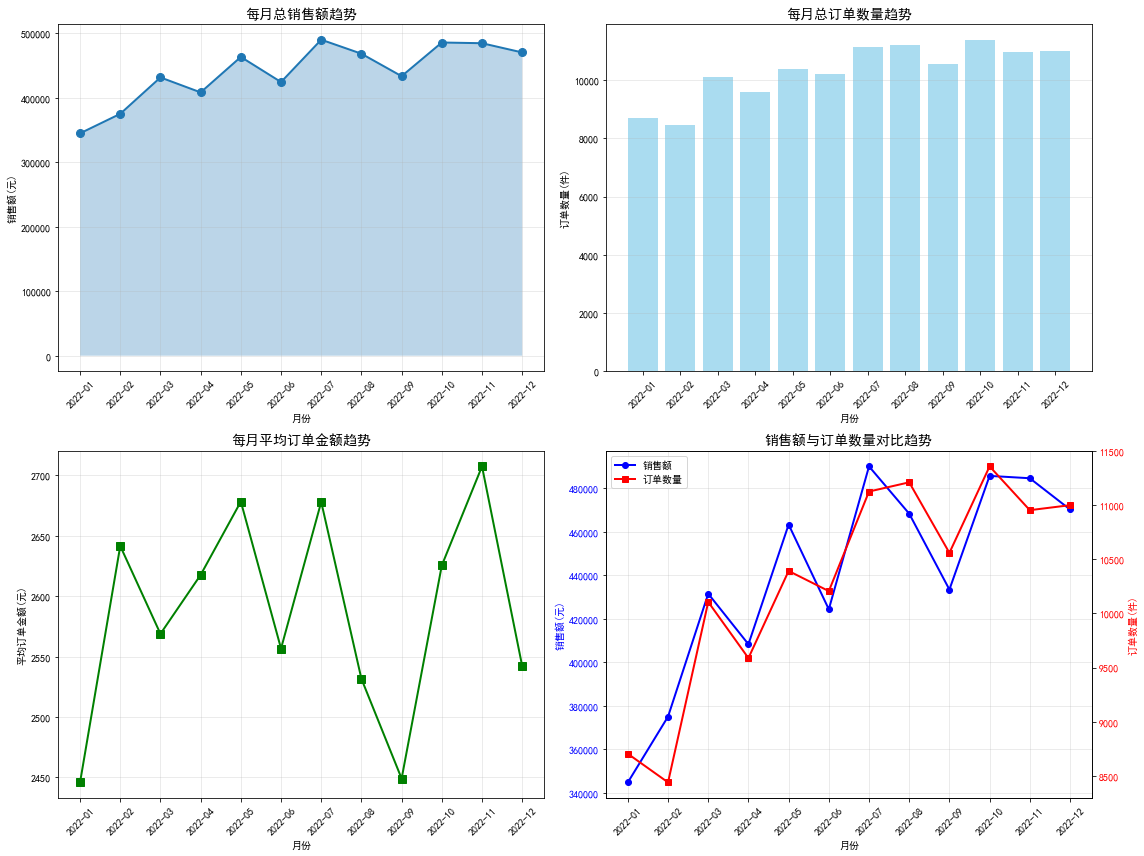


数据分析报告摘要

一、总体销售趋势:
1. 总销售额: 5,280,308.00元
2. 总订单数量: 2,040个
3. 总销售商品数量: 123,641件
4. 平均订单金额: 2588.39元


In [12]:
# 问题1: 分析商品每月销售变化趋势
print("\n=== 问题1: 商品每月销售变化趋势 ===")

# 1.1 按月统计总销售额和总订单数量
monthly_stats = df_merged.groupby('月份').agg({
    '销售额': 'sum',
    '订单数量': 'sum',
    '订单编号': 'nunique'  # 订单数量（去重）
}).reset_index()

monthly_stats['月份_str'] = monthly_stats['月份'].astype(str)
monthly_stats['平均订单金额'] = monthly_stats['销售额'] / monthly_stats['订单编号']

print("每月销售统计:")
print(monthly_stats)

# 绘制总销售额趋势图
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. 总销售额趋势
axes[0, 0].plot(monthly_stats['月份_str'], monthly_stats['销售额'], marker='o', linewidth=2, markersize=8)
axes[0, 0].set_title('每月总销售额趋势', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('月份')
axes[0, 0].set_ylabel('销售额(元)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 填充面积
axes[0, 0].fill_between(monthly_stats['月份_str'], monthly_stats['销售额'], alpha=0.3)

# 2. 总订单数量趋势
axes[0, 1].bar(monthly_stats['月份_str'], monthly_stats['订单数量'], color='skyblue', alpha=0.7)
axes[0, 1].set_title('每月总订单数量趋势', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('月份')
axes[0, 1].set_ylabel('订单数量(件)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. 平均订单金额趋势
axes[1, 0].plot(monthly_stats['月份_str'], monthly_stats['平均订单金额'], 
                marker='s', color='green', linewidth=2, markersize=8)
axes[1, 0].set_title('每月平均订单金额趋势', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('月份')
axes[1, 0].set_ylabel('平均订单金额(元)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. 销售额和订单数量双轴图
ax1 = axes[1, 1]
ax2 = ax1.twinx()

line1 = ax1.plot(monthly_stats['月份_str'], monthly_stats['销售额'], 
                 'b-', marker='o', label='销售额', linewidth=2)
ax1.set_xlabel('月份')
ax1.set_ylabel('销售额(元)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.tick_params(axis='x', rotation=45)

line2 = ax2.plot(monthly_stats['月份_str'], monthly_stats['订单数量'], 
                 'r-', marker='s', label='订单数量', linewidth=2)
ax2.set_ylabel('订单数量(件)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 合并图例
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

axes[1, 1].set_title('销售额与订单数量对比趋势', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('每月销售趋势分析.png', dpi=300, bbox_inches='tight')
plt.show()


# 生成分析报告摘要
print("\n" + "="*80)
print("数据分析报告摘要")
print("="*80)

print("\n一、总体销售趋势:")
print(f"1. 总销售额: {df_merged['销售额'].sum():,.2f}元")
print(f"2. 总订单数量: {df_merged['订单编号'].nunique():,}个")
print(f"3. 总销售商品数量: {df_merged['订单数量'].sum():,}件")
print(f"4. 平均订单金额: {df_merged['销售额'].sum() / df_merged['订单编号'].nunique():.2f}元")



=== 问题2: 小类商品每月销售变化趋势 ===
销售额前10的小类商品: ['外套', '背心', '短袖', '长袖', '长裤', '短裤', '袜子', '发带', '手环']


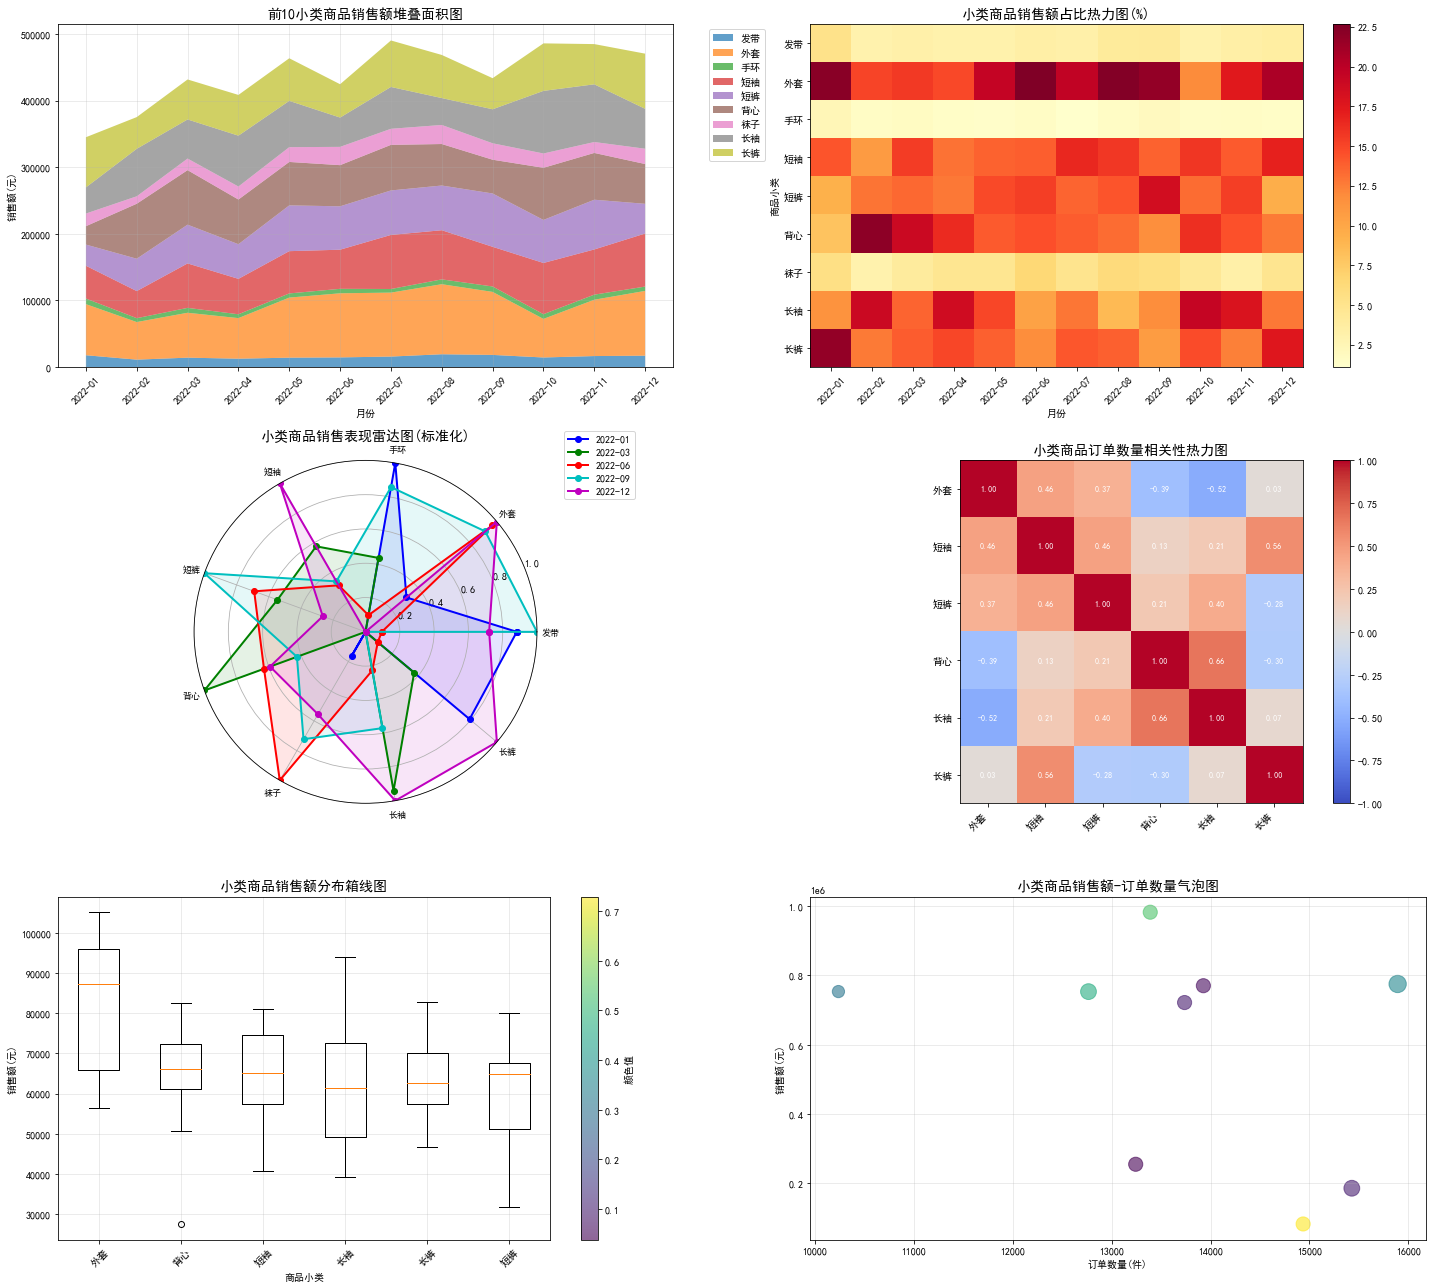


数据分析报告摘要

二、关键发现:
1. 销售额最高的月份:  2022-07
2. 销售额最高的小类商品:  外套
3. 最畅销的商品:  跑步宽松速干短裤


In [19]:
# 问题2: 分析小类商品每月销售变化趋势
print("\n=== 问题2: 小类商品每月销售变化趋势 ===")

# 2.1 按月和小类统计销售额
monthly_category_sales = df_merged.groupby(['月份', '商品小类']).agg({
    '销售额': 'sum',
    '订单数量': 'sum'
}).reset_index()

monthly_category_sales['月份_str'] = monthly_category_sales['月份'].astype(str)

# 获取销售额前10的小类商品
top_categories = monthly_category_sales.groupby('商品小类')['销售额'].sum().nlargest(10).index.tolist()
monthly_top_categories = monthly_category_sales[monthly_category_sales['商品小类'].isin(top_categories)]

print(f"销售额前10的小类商品: {top_categories}")

# 2.2 创建更多样化的可视化图表 - 使用5个子图而不是6个，避免空白图表
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# 1. 堆叠面积图 - 展示小类商品销售额占比变化
category_pivot = monthly_top_categories.pivot_table(
    index='月份_str', 
    columns='商品小类', 
    values='销售额', 
    aggfunc='sum'
).fillna(0)

axes[0, 0].stackplot(category_pivot.index, category_pivot.T.values, 
                     labels=category_pivot.columns, alpha=0.7)
axes[0, 0].set_title('前10小类商品销售额堆叠面积图', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('月份')
axes[0, 0].set_ylabel('销售额(元)')
axes[0, 0].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. 热力图 - 展示小类商品每月销售额热度
category_pivot_percent = category_pivot.div(category_pivot.sum(axis=1), axis=0) * 100

im = axes[0, 1].imshow(category_pivot_percent.T, aspect='auto', cmap='YlOrRd')
axes[0, 1].set_title('小类商品销售额占比热力图(%)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('月份')
axes[0, 1].set_ylabel('商品小类')
axes[0, 1].set_xticks(range(len(category_pivot_percent.index)))
axes[0, 1].set_xticklabels(category_pivot_percent.index, rotation=45)
axes[0, 1].set_yticks(range(len(category_pivot_percent.columns)))
axes[0, 1].set_yticklabels(category_pivot_percent.columns)

# 添加颜色条
plt.colorbar(im, ax=axes[0, 1])

# 3. 雷达图 - 展示各小类商品在不同月份的销售表现
from matplotlib.patches import Circle

# 选择几个关键月份
key_months = ['2022-01', '2022-03', '2022-06', '2022-09', '2022-12']
key_data = category_pivot.loc[key_months]

# 标准化数据用于雷达图
radar_data = (key_data - key_data.min()) / (key_data.max() - key_data.min())

# 设置雷达图
categories = list(radar_data.columns)
N = len(categories)

# 计算每个角度
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # 闭合图形

# 创建雷达图
ax_radar = axes[1, 0]
ax_radar = plt.subplot(3, 2, 3, polar=True)  

# 绘制每个月份的数据
colors = ['b', 'g', 'r', 'c', 'm']
for i, month in enumerate(key_months):
    values = radar_data.loc[month].tolist()
    values += values[:1]  # 闭合图形
    ax_radar.plot(angles, values, 'o-', linewidth=2, label=month, color=colors[i])
    ax_radar.fill(angles, values, alpha=0.1, color=colors[i])

# 设置标签
ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(categories, fontsize=9)
ax_radar.set_ylim(0, 1)
ax_radar.set_title('小类商品销售表现雷达图(标准化)', fontsize=14, fontweight='bold', pad=20)
ax_radar.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax_radar.grid(True)

# 4. 散点图矩阵 - 展示小类商品间的相关性
# 选择前6个小类商品进行散点图分析
top_6_categories = top_categories[:6]
scatter_data = monthly_top_categories[monthly_top_categories['商品小类'].isin(top_6_categories)]

# 透视表准备数据
scatter_pivot = scatter_data.pivot_table(
    index='月份_str',
    columns='商品小类',
    values='订单数量',
    aggfunc='sum'
).fillna(0)

# 计算相关系数矩阵
corr_matrix = scatter_pivot.corr()

# 绘制相关性热力图
im2 = axes[1, 1].imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
axes[1, 1].set_title('小类商品订单数量相关性热力图', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(range(len(corr_matrix.columns)))
axes[1, 1].set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
axes[1, 1].set_yticks(range(len(corr_matrix.columns)))
axes[1, 1].set_yticklabels(corr_matrix.columns)

# 添加相关系数值
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = axes[1, 1].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                               ha="center", va="center", color="w", fontsize=8)

plt.colorbar(im2, ax=axes[1, 1])

# 5. 箱线图 - 展示小类商品销售额分布
boxplot_data = []
boxplot_labels = []

for category in top_6_categories:
    category_sales = monthly_top_categories[monthly_top_categories['商品小类'] == category]['销售额']
    if len(category_sales) > 0:
        boxplot_data.append(category_sales.values)
        boxplot_labels.append(category)

axes[2, 0].boxplot(boxplot_data, labels=boxplot_labels)
axes[2, 0].set_title('小类商品销售额分布箱线图', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('商品小类')
axes[2, 0].set_ylabel('销售额(元)')
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].grid(True, alpha=0.3)

# 6. 气泡图 - 展示小类商品的销售额、订单数量和商品数量关系
bubble_data = df_merged.groupby('商品小类').agg({
    '销售额': 'sum',
    '订单数量': 'sum',
    '商品编号': 'nunique'
}).reset_index()

# 选择前15个小类商品
bubble_data = bubble_data.nlargest(15, '销售额')

scatter = axes[2, 1].scatter(
    bubble_data['订单数量'],
    bubble_data['销售额'],
    s=bubble_data['商品编号'] * 50,  # 气泡大小表示商品种类数量
    alpha=0.6,
    c=np.random.rand(len(bubble_data)),  # 随机颜色
    cmap='viridis'
)

axes[2, 1].set_title('小类商品销售额-订单数量气泡图', fontsize=14, fontweight='bold')
axes[2, 1].set_xlabel('订单数量(件)')
axes[2, 1].set_ylabel('销售额(元)')
axes[2, 1].grid(True, alpha=0.3)

# 添加标签
for i, row in bubble_data.iterrows():
    axes[2, 0].annotate(row['商品小类'], 
                       (row['订单数量'], row['销售额']),
                       fontsize=8, alpha=0.7)

# 添加颜色条
plt.colorbar(scatter, ax=axes[2, 0], label='颜色值')

plt.tight_layout()
plt.savefig('小类商品销售趋势分析.png', dpi=300, bbox_inches='tight')
plt.show()



# 生成分析报告摘要
print("\n" + "="*80)
print("数据分析报告摘要")
print("="*80)

print("\n二、关键发现:")
print("1. 销售额最高的月份: ", monthly_stats.loc[monthly_stats['销售额'].idxmax(), '月份_str'])
print("2. 销售额最高的小类商品: ", top_categories[0] if top_categories else "无数据")
print("3. 最畅销的商品: ", product_sales.iloc[0]['商品名称'])



=== 其他数据分析 ===

3.1 商品价格区间分析:
价格区间分析:
      价格区间        销售额   订单数量  商品编号  订单编号       平均售价       平均订单金额
0    0-20元   490481.0  42078    12   696  11.656471   704.714080
1   21-40元   464508.0  14814     6   248  31.356015  1873.016129
2   41-60元  1667110.0  30650    11   499  54.391843  3340.901804
3   61-80元  2040494.0  29062     8   487  70.211754  4189.926078
4  81-100元   617715.0   6959     2   109  88.764909  5667.110092
5   100元以上        0.0      0     0     0        NaN          NaN

3.2 商品大类销售分析:
商品大类销售统计:
   商品大类        销售额   订单数量  商品编号  销售额占比   平均单价
0  运动上装  3282383.0  53450    17  62.16  61.41
1  运动下装  1475314.0  26505     9  27.94  55.66
2  运动配饰   522611.0  43608    13   9.90  11.98

3.3 商品销售排名分析:
销售额TOP 10商品:
        商品名称 商品小类  商品大类       销售额  订单数量  销售额排名
9   跑步宽松速干短裤   短裤  运动下装  473747.0  5323      1
6    半拉链立领长袖   长袖  运动上装  397440.0  5760      2
28  速干户外跑步外套   外套  运动上装  388908.0  4986      3
26    瑜伽运动外套   外套  运动上装  342540.0  5190      4
5     美背裸感背心   背心  运动上装  301903.0 

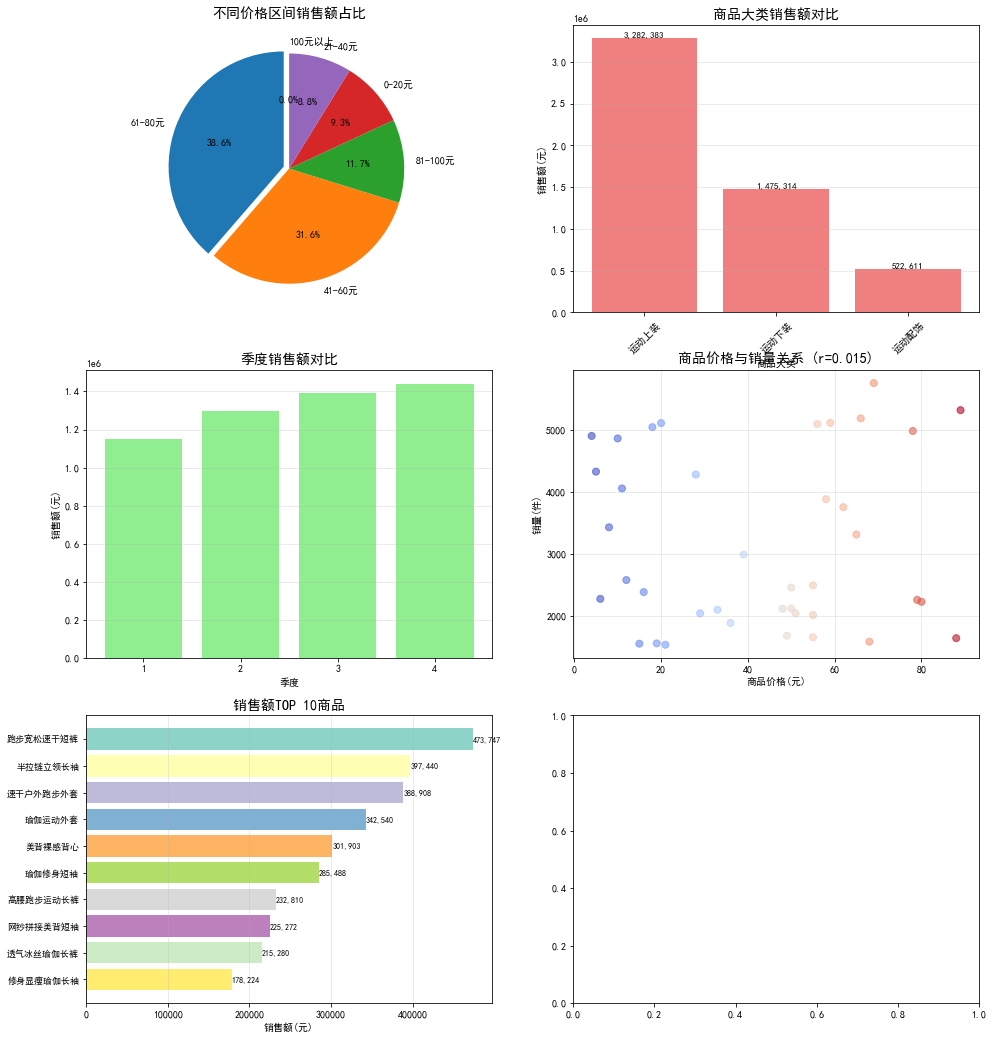

In [7]:
# 支撑销售策略调整的其他数据分析
print("\n=== 其他数据分析 ===")

# 3.1 商品价格区间分析
print("\n3.1 商品价格区间分析:")
price_bins = [0, 20, 40, 60, 80, 100, 200]
price_labels = ['0-20元', '21-40元', '41-60元', '61-80元', '81-100元', '100元以上']

df_merged['价格区间'] = pd.cut(df_merged['商品销售价'], bins=price_bins, labels=price_labels)

price_segment_stats = df_merged.groupby('价格区间').agg({
    '销售额': 'sum',
    '订单数量': 'sum',
    '商品编号': 'nunique',
    '订单编号': 'nunique'
}).reset_index()

price_segment_stats['平均售价'] = price_segment_stats['销售额'] / price_segment_stats['订单数量']
price_segment_stats['平均订单金额'] = price_segment_stats['销售额'] / price_segment_stats['订单编号']

print("价格区间分析:")
print(price_segment_stats)

# 3.2 商品大类销售分析
print("\n3.2 商品大类销售分析:")
category_sales = df_merged.groupby('商品大类').agg({
    '销售额': 'sum',
    '订单数量': 'sum',
    '商品编号': 'nunique'
}).reset_index()

category_sales['销售额占比'] = (category_sales['销售额'] / category_sales['销售额'].sum() * 100).round(2)
category_sales['平均单价'] = (category_sales['销售额'] / category_sales['订单数量']).round(2)

print("商品大类销售统计:")
print(category_sales)

# 3.3 商品销售排名分析
print("\n3.3 商品销售排名分析:")
product_sales = df_merged.groupby(['商品编号', '商品名称', '商品小类', '商品大类']).agg({
    '销售额': 'sum',
    '订单数量': 'sum'
}).reset_index()

# 按销售额排名
product_sales = product_sales.sort_values('销售额', ascending=False)
product_sales['销售额排名'] = range(1, len(product_sales) + 1)

print("销售额TOP 10商品:")
print(product_sales.head(10)[['商品名称', '商品小类', '商品大类', '销售额', '订单数量', '销售额排名']])

# 按订单数量排名
product_sales_qty = product_sales.sort_values('订单数量', ascending=False)
product_sales_qty['销量排名'] = range(1, len(product_sales_qty) + 1)

print("\n销量TOP 10商品:")
print(product_sales_qty.head(10)[['商品名称', '商品小类', '商品大类', '订单数量', '销售额', '销量排名']])

# 3.4 季节性分析
print("\n3.4 季节性分析:")
df_merged['季度'] = df_merged['订单日期'].dt.quarter
seasonal_sales = df_merged.groupby('季度').agg({
    '销售额': 'sum',
    '订单数量': 'sum',
    '订单编号': 'nunique'
}).reset_index()

seasonal_sales['平均订单金额'] = seasonal_sales['销售额'] / seasonal_sales['订单编号']
print("季度销售分析:")
print(seasonal_sales)

# 3.5 价格弹性分析（简单版本）
print("\n3.5 价格与销量关系分析:")
# 按商品分析价格与销量的关系
price_elasticity = df_merged.groupby('商品编号').agg({
    '商品销售价': 'mean',
    '订单数量': 'sum'
}).reset_index()

# 计算相关系数
correlation = price_elasticity['商品销售价'].corr(price_elasticity['订单数量'])
print(f"商品价格与销量的相关系数: {correlation:.3f}")

# 3.6 商品组合分析（关联规则 - 简化版）
print("\n3.6 商品组合分析:")
# 按订单分组，找出每个订单购买的商品
order_products = df_merged.groupby('订单编号')['商品名称'].apply(list).reset_index()

# 找出最常见的商品组合（这里简化处理，只找两两组合）
from itertools import combinations
from collections import defaultdict

product_pairs = defaultdict(int)

for products in order_products['商品名称']:
    if len(products) >= 2:
        # 获取所有两两组合
        for combo in combinations(sorted(products), 2):
            product_pairs[combo] += 1

# 找出最常见的10个商品组合
top_combinations = sorted(product_pairs.items(), key=lambda x: x[1], reverse=True)[:10]

print("最常见的10个商品组合:")
for combo, count in top_combinations:
    print(f"{combo[0]} + {combo[1]}: {count}次")

# 3.7 可视化展示补充分析结果
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 1. 价格区间销售额占比饼图
price_segment_stats = price_segment_stats.sort_values('销售额', ascending=False)
axes[0, 0].pie(price_segment_stats['销售额'], 
               labels=price_segment_stats['价格区间'],
               autopct='%1.1f%%',
               startangle=90,
               explode=[0.05 if i == 0 else 0 for i in range(len(price_segment_stats))])
axes[0, 0].set_title('不同价格区间销售额占比', fontsize=14, fontweight='bold')

# 2. 商品大类销售额柱状图
axes[0, 1].bar(category_sales['商品大类'], category_sales['销售额'], color='lightcoral')
axes[0, 1].set_title('商品大类销售额对比', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('商品大类')
axes[0, 1].set_ylabel('销售额(元)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 在柱子上添加数值
for i, v in enumerate(category_sales['销售额']):
    axes[0, 1].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=9)

# 3. 季度销售额趋势
axes[1, 0].bar(seasonal_sales['季度'].astype(str), seasonal_sales['销售额'], color='lightgreen')
axes[1, 0].set_title('季度销售额对比', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('季度')
axes[1, 0].set_ylabel('销售额(元)')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. 价格与销量散点图
scatter = axes[1, 1].scatter(price_elasticity['商品销售价'], 
                            price_elasticity['订单数量'],
                            alpha=0.6,
                            s=50,
                            c=price_elasticity['商品销售价'],
                            cmap='coolwarm')
axes[1, 1].set_title(f'商品价格与销量关系 (r={correlation:.3f})', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('商品价格(元)')
axes[1, 1].set_ylabel('销量(件)')
axes[1, 1].grid(True, alpha=0.3)


# 5. 销售额TOP 10商品
top10_products = product_sales.head(10)
colors = plt.cm.Set3(np.linspace(0, 1, 10))
bars = axes[2, 0].barh(range(10), top10_products['销售额'], color=colors)
axes[2, 0].set_title('销售额TOP 10商品', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('销售额(元)')
axes[2, 0].set_yticks(range(10))
axes[2, 0].set_yticklabels(top10_products['商品名称'], fontsize=9)
axes[2, 0].invert_yaxis()  # 最高值在顶部
axes[2, 0].grid(True, alpha=0.3, axis='x')

# 在柱子上添加数值
for i, (bar, v) in enumerate(zip(bars, top10_products['销售额'])):
    width = bar.get_width()
    axes[2, 0].text(width, bar.get_y() + bar.get_height()/2, 
                   f'{v:,.0f}', ha='left', va='center', fontsize=8)
